In [1]:
import pandas as pd
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import seaborn as sns

#Displays the plots directly in the notebook
%matplotlib inline 

In [2]:
data = pd.read_csv('all_data.csv')
data = data.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'})
data.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
#Change the name United States of America to USA
data['Country'] = data['Country'].replace('United States of America', 'USA')

In [4]:
countries = data.Country.unique()
years = data.Year.unique()
print(f'Countries : {countries}')
print(f'Years : {years}')

Countries : ['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
Years : [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [5]:
#Checking or null values
data.isnull().sum()

Country            0
Year               0
Life_expectancy    0
GDP                0
dtype: int64

In [6]:
avg_data = []

for country in countries: 
    avg_life_expectancy = round(data.Life_expectancy[data.Country == country].mean())
    avg_gdp = round(data.GDP[data.Country == country].mean())

    avg_data.append({'Country': country, 'Average Life Expectancy': avg_life_expectancy, 'Average GDP': avg_gdp})


avg_df = pd.DataFrame(avg_data)
avg_df

,Country,Average Life Expectancy,Average GDP
0,Chile,79,169788845015
1,China,74,4957713750000
2,Germany,80,3094775625000
3,Mexico,76,976650625000
4,USA,78,14075000000000
5,Zimbabwe,50,9062579595


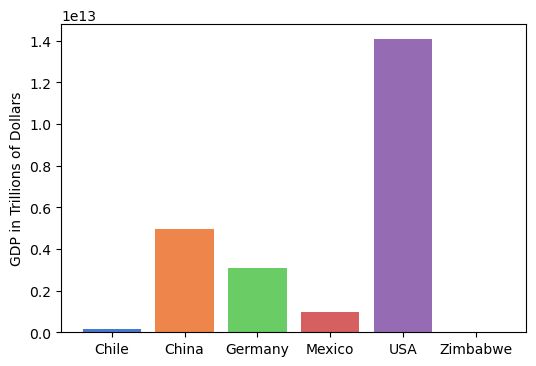

In [7]:
# Create a color palette from seaborn to use in matplotlib plo
palette = sns.color_palette('muted', n_colors = 6)

plt.figure(figsize = (6,4))
plt.bar('Country', 'Average GDP', data = avg_df, color = palette)
plt.ylabel('GDP in Trillions of Dollars')
plt.show()

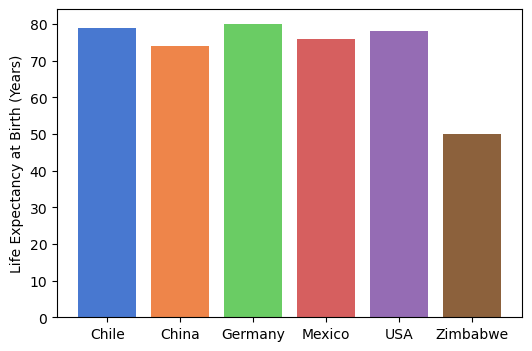

In [8]:
plt.figure(figsize = (6,4))
plt.bar('Country', 'Average Life Expectancy', data = avg_df, color = palette )
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()

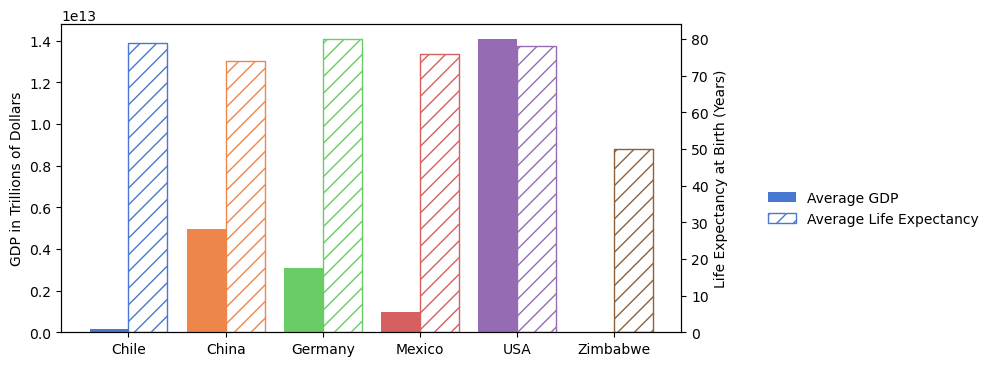

In [9]:
n = 1
t = 2
d = 6
w = 0.8
x_values1 = [t * element + w*n for element in range(d)]

n = 2
x_values2 = [t * element + w*n for element in range(d)]


fig, ax1 = plt.subplots(figsize=(8,4))

GDP_bars = plt.bar(x_values1, avg_df['Average GDP'], color = palette, label = 'Average GDP') 
ax1.set_ylabel('GDP in Trillions of Dollars')

# Creates a second y axis diferent from de GDP
ax2 = ax1.twinx()

LE_bars = plt.bar(x_values2, avg_df['Average Life Expectancy'], color = 'none', edgecolor = palette, hatch='//', label = 'Average Life Expectancy')
ax2.set_ylabel('Life Expectancy at Birth (Years)')

# Change de x axis to match the Countries
ax1.set_xticks([x + w/2 for x in x_values1]) # Center the labels of the bars for each country
ax1.set_xticklabels(avg_df['Country']) 

ax1.legend(handles=[GDP_bars, LE_bars], bbox_to_anchor=(1.5, 0.5), edgecolor = 'none')
plt.show()


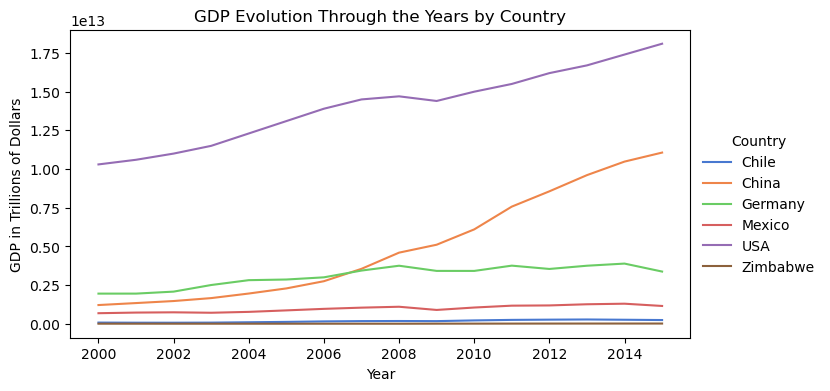

In [69]:
plt.figure(figsize = (8,4))

sns.lineplot(x = 'Year', y = 'GDP', hue = 'Country', data = data, palette = ('muted'))

plt.title('GDP Evolution Through the Years by Country')
plt.legend(title = 'Country', loc = 2, bbox_to_anchor=(1, 0.7),  edgecolor = 'none')

plt.xlabel('Year')
plt.ylabel('GDP in Trillions of Dollars')

plt.show()

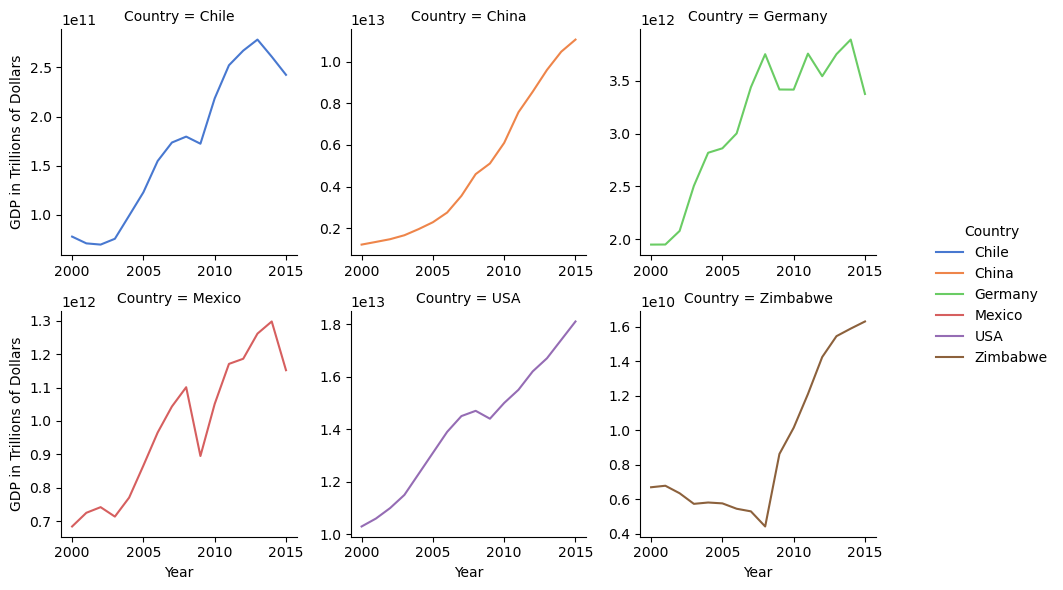

In [11]:
GDP_grid = sns.FacetGrid(data, col='Country', hue = 'Country', 
                         col_wrap = 3, sharey = False, sharex = False, palette = ('muted'))

GDP_grid.map(sns.lineplot, 'Year', 'GDP')
GDP_grid.add_legend(bbox_to_anchor=(1.05, 0.5)).set_axis_labels('Year','GDP in Trillions of Dollars')
GDP_grid.fig.subplots_adjust(hspace=0.25)

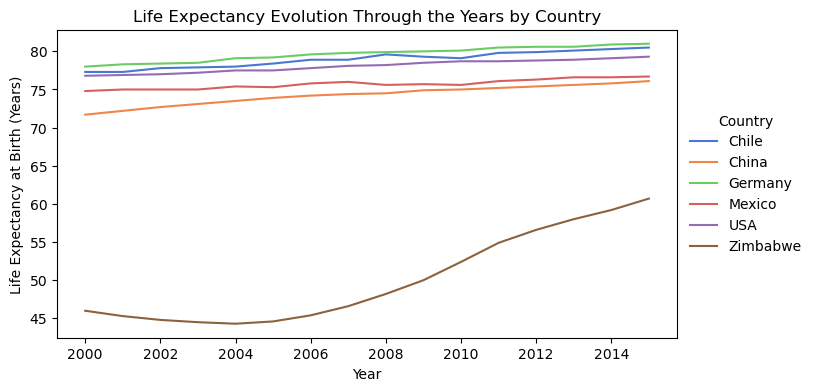

In [12]:
plt.figure(figsize = (8, 4))

sns.lineplot(x = 'Year', y = 'Life_expectancy', hue = 'Country', data = data, palette = ('muted'))

plt.title('Life Expectancy Evolution Through the Years by Country')
plt.legend(title = 'Country', loc = 6, bbox_to_anchor=(1, 0.5), edgecolor = 'none')

plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')


plt.show()

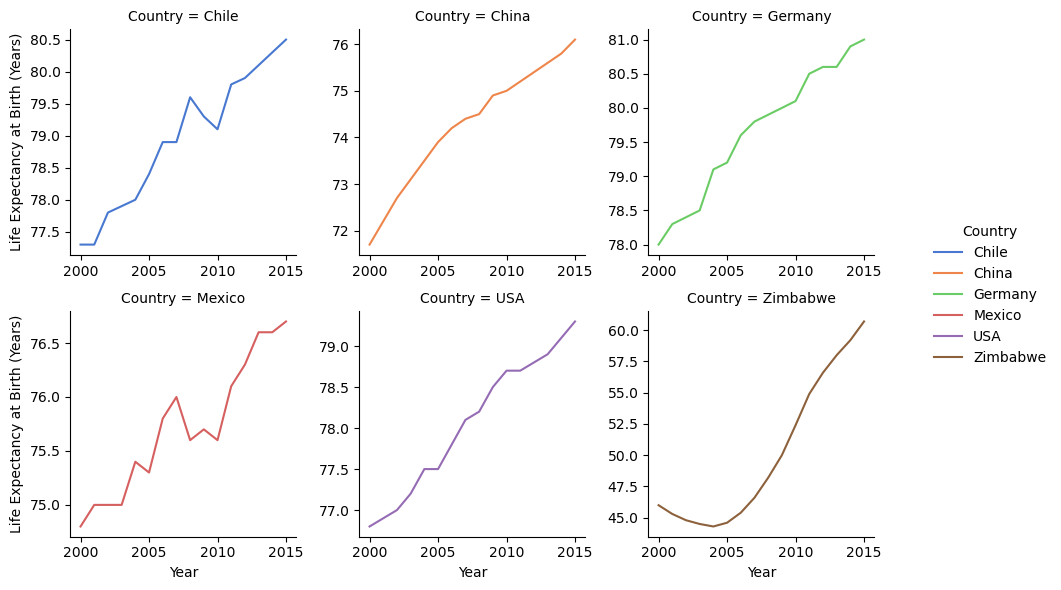

In [13]:

GDP_grid = sns.FacetGrid(data, col='Country', hue = 'Country', 
                         col_wrap = 3, sharey = False, sharex = False, palette = ('muted'))

GDP_grid.map(sns.lineplot, 'Year', 'Life_expectancy')
GDP_grid.add_legend(bbox_to_anchor=(1.05, 0.5)).set_axis_labels('Year', 'Life Expectancy at Birth (Years)')
GDP_grid.fig.subplots_adjust(hspace=0.25)

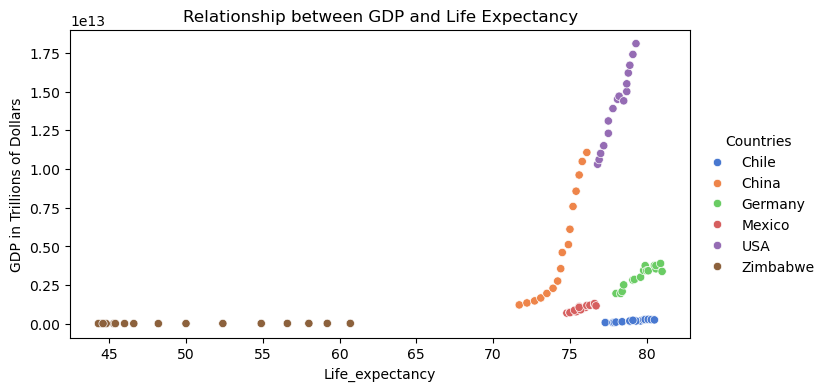

In [71]:
plt.figure(figsize = (8,4))

sns.scatterplot(x = 'Life_expectancy', y = 'GDP' , hue = 'Country', data = data, palette = ('muted'))

plt.title('Relationship between GDP and Life Expectancy')
plt.legend(title = 'Countries', loc = 2, bbox_to_anchor=(1, 0.7), edgecolor = 'none')

plt.xlabel
plt.ylabel('GDP in Trillions of Dollars')

plt.show()


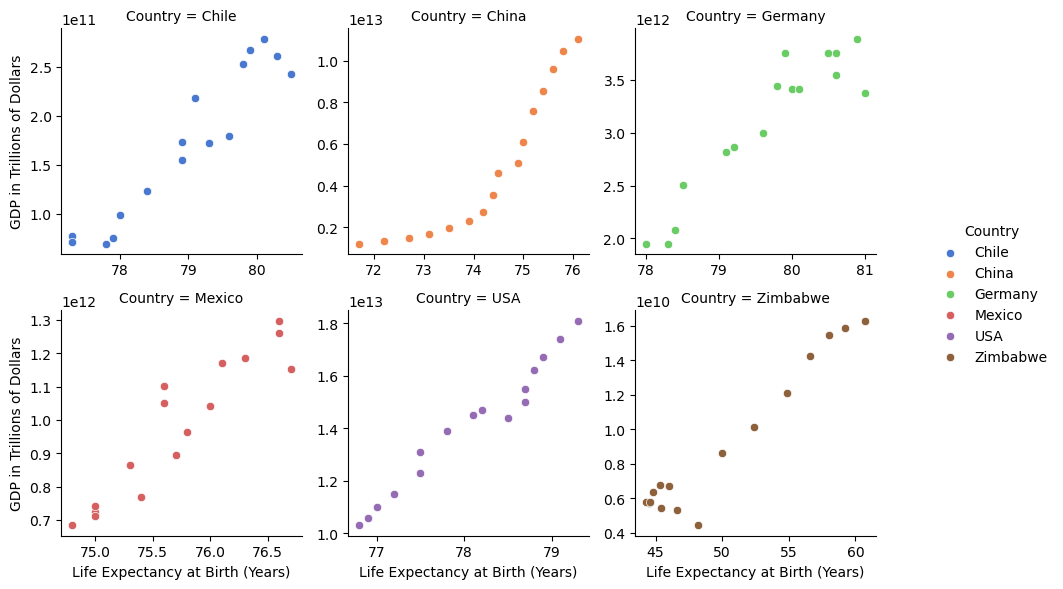

In [115]:
GDP_grid = sns.FacetGrid(data, col='Country', hue = 'Country', 
                         col_wrap = 3, sharey = False, sharex = False, palette = 'muted')

GDP_grid.map(sns.scatterplot, 'Life_expectancy', 'GDP')
GDP_grid.add_legend(bbox_to_anchor=(1.05, 0.5)).set_axis_labels('Life Expectancy at Birth (Years)', 'GDP in Trillions of Dollars')
GDP_grid.fig.subplots_adjust(hspace=0.25)

In [91]:
correlation_results = []

for country in countries: 
    corr_GDP_LE, p = pearsonr(data.GDP[data.Country == country], data.Life_expectancy[data.Country == country]) 
    correlation_results.append({'Country' : country, 'GDP and Life Expectancy Correlation': corr_GDP_LE, 'p-value' : p })

correlation_by_country_df = pd.DataFrame(correlation_results)
correlation_by_country_df

,Country,GDP and Life Expectancy Correlation,p-value
0,Chile,0.949877,1.865914e-08
1,China,0.908526,1.125099e-06
2,Germany,0.932699,1.401882e-07
3,Mexico,0.932238,1.468696e-07
4,USA,0.981709,1.749971e-11
5,Zimbabwe,0.966200,1.235852e-09


In [123]:
corr, p = pearsonr(avg_df['Average GDP'], avg_df['Average Life Expectancy'])
print(f'GDP and Life Expectancy Correlation: {round(corr, 4)}')

GDP and Life Expectancy Correlation: 0.3436


# Conclusions

- Overall, the life expectancy has increased for all six countries.
    - Between 2000 and 2005, the life expectancy in Zimbabwe decreased. This may have been a result of the HIV/AIDS epidemic that affected the region during this period.      
    - Despite the decrease between 2000 and 2005, Zimbabwe was the country with the greatest increase in life expectancy.
- Overall, GDP has increased for all six countries, with China being the country with the greatest increase.
- There is a positive correlation between GDP and life expectancy for the countries analyzed.
